# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 1. **Introduction:**
In the modern digital era, the recipe industry has experienced a significant shift towards online platforms, with people seeking culinary inspiration and guidance at their fingertips. For recipe websites and applications, understanding the factors that contribute to high-traffic recipes is essential for attracting and retaining a large and engaged user base.

This report presents the results of our predictive modeling efforts to identify recipes that are likely to attract high traffic on our platform. We employed two machine learning algorithms, namely Logistic Regression and Random Forest Classifier, to predict the likelihood of a recipe being classified as 'High' traffic.

### Business Objectives:
The primary objectives of this predictive modeling project are as follows:
- **Identify High-Traffic Recipes:** Develop accurate models to predict which recipes are likely to attract a significant number of users, enabling us to focus on promoting and showcasing the most popular recipes.
- **Predict High-Traffic Recipes with Confidence:** Implement models that can confidently predict recipes with an 80% probability of being classified as 'High' traffic. These predictions can be leveraged for targeted marketing and promotional strategies.

In [11]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


## 2. Data Validation
The data set contains 947 rows and 8 columns. To validate all variable, several changes are required including replacing missing values and invalid values. The data comprise of 8 variables: recipe,calories, carbohydrate, sugar, protein, category, servings, and high_trafic. Each variable was validated in following way:

- **recipe**: This variable contained 947 unique identifiers without missing values. This variable is **valid**.
- **calories**: It contained 895 non-null values with 52 missing values. The missing values are replaced with the **mean of calories grouped** by category and servings.
- **carbohydrate**: It contained 895 non-null values with 52 missing values. The missing values are replaced with **the mean of carbohydrate** grouped by category and servings.
- **sugar**: It contained **895 non-null values** with 52 missing values. The missing values are replaced with **the mean of sugar** grouped by category and servings.
- **protein**: It contained 895 non-null values with 52 missing values. The missing values are replaced with **the mean of protein **grouped by category and servings.
- **category**: It contianed **11 unique values**, however, the description indicates that there are **10 unique values**. Therefore 'Chicken Breast' is replaced with 'Chicken'.
- **servings**: It contained 6 unique values without missing values. By description, it should be **numeric variable**, but now it's character because it contained two extra values: **'4 as a snack' and '6 as a snack'**. To correct these values, they are replaced with **'4' and '6'** and changed the column's type to **integer**.
- **high_traffic**: It contained only 574 values and only 1 unique non-null value **("High")**. All null values are replaced with "Low".

According to the given information, the nutritional data was given in single serving. Therefore these values are multiplied with their respective servings and new columns are added: calories_all, carbohydrate_all, sugar_all, and protein_all. These variables are used for model fitting.

In [28]:
#Data Validation
# Replacing missing values
df.isna().sum()
df.high_traffic.fillna(value='Low', inplace=True)

#Replacing invalid values
df['servings'] = df['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int') 
df['category'] = df['category'].replace({"Chicken Breast": 'Chicken'}) 

#Replacing missing values
columns_name_na = ['calories', 'carbohydrate', 'sugar', 'protein']
for name in columns_name_na:
    df[name] = df[name].fillna(value = df.groupby(['category','servings'])[name].transform('mean'))

#Replacing values with 
for name in columns_name_na:
    df[name + '_all'] = df[name] * df['servings']
df2 = df.iloc[:,5:12]
print('Descriptive Statistics of Numeric Variables')
df2.describe()

Descriptive Statistics of Numeric Variables


,servings,calories_all,carbohydrate_all,sugar_all,protein_all
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,3.477297,1510.069175,120.436173,31.187254,85.358105
std,1.732741,1864.150772,174.304305,53.903270,156.407579
min,1.000000,0.280000,0.100000,0.060000,0.000000
25%,2.000000,318.690000,24.140000,4.420000,9.595000
50%,4.000000,816.250000,62.720000,13.800000,35.280000
75%,4.000000,2067.555000,148.540000,33.600000,92.300000
max,6.000000,17436.060000,2121.680000,521.820000,2180.160000


## 3. Exploratory Analysis

In this section, we performed some exploratory analysis on the given recipe dataset to understand its features better. For this analysis, we started by plotting two different graphics to demonstrate the characteristics of single variables. Then, we'll create a count plot showing the frequency of the 'servings' and 'category' variables, using 'high_traffic' as a legend to represent the high traffic status of recipes.

### 3.1 Target Variable - High_Traffic:
Since we need to predict the High_Traffic, this variable would be our target variable. The frequency graph of this variable is depicted below.


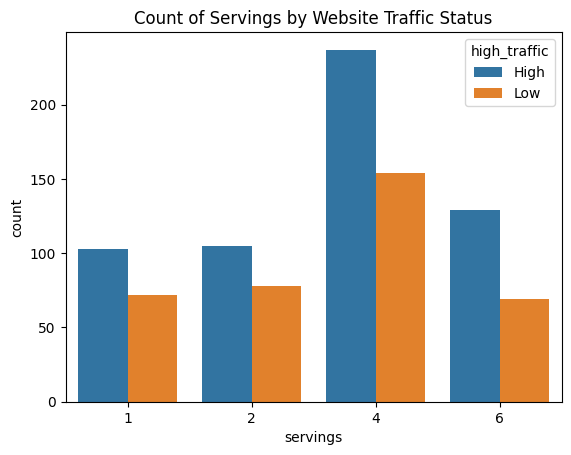

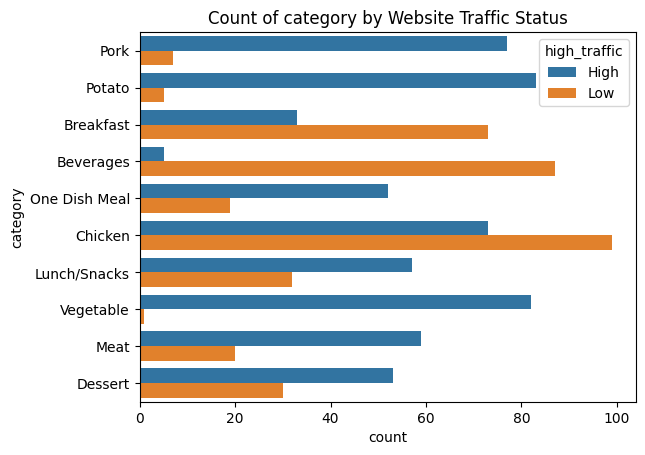

In [13]:
#Data Exploration
#Target Variable:
sns.countplot(df2, x="servings", hue="high_traffic")
plt.title('Count of Servings by Website Traffic Status')
plt.show()

sns.countplot(df2, y="category", hue="high_traffic")
plt.title('Count of category by Website Traffic Status')
plt.show()

Based on the provided count plot for the relationship between 'servings', 'category', and 'high_traffic', we can draw the following conclusion:
For each serving size, the number of recipes with high traffic is more than the number of recipes with low traffic. The bars representing 'High' traffic recipes are consistently taller for all serving sizes, indicating that a larger proportion of recipes with high traffic are present in the dataset. This observation suggests that the 'servings' feature alone may not have a significant influence on the target variable ('high_traffic'). While it is essential to note this relationship, we should also consider the interactions of other features to understand better which factors contribute most to the high traffic status of recipes.

On the other hand, based on the provided analysis, we can draw the following conclusions regarding the relationship between recipe categories and their traffic:
- Potato, Pork, and Vegetable categories have a significantly higher number of recipes with **high traffic** compared to recipes with low traffic. These categories seem to be popular among users, leading to more traffic and attention.
- One Dish Meal, Lunch/Snacks, Meat, and Dessert categories have slightly more recipes with **high traffic** than recipes with low traffic. While these categories are also popular, the difference in traffic between high and low may not be as pronounced as in the previously mentioned categories.

### 3.2 Relationship between features:
Different types of plots and visualizations are used to explore relationships between features in the dataset. 
- **Heatmap**: In EDA, a heatmap is commonly used to visualize the correlations between numeric variables. Each cell in the heatmap corresponds to the correlation coefficient between two variables. High positive correlation is usually represented by a brighter color, while high negative correlation is represented by a darker color. Heatmaps help identify which variables are strongly related and provide valuable insights into the underlying structure of the dataset.
- **Catplot Violin**: The violin plot is used to visualize the distribution of a numeric variable across different categories. It shows the distribution of the data as a combination of a box plot and a kernel density plot. The width of the violin at a particular category indicates the density of data points in that category.
- **Catplot Count**: The count plot is a bar plot used to display the frequency of occurrences of each category in a categorical variable. It helps to understand the distribution and imbalance of categories in the dataset.

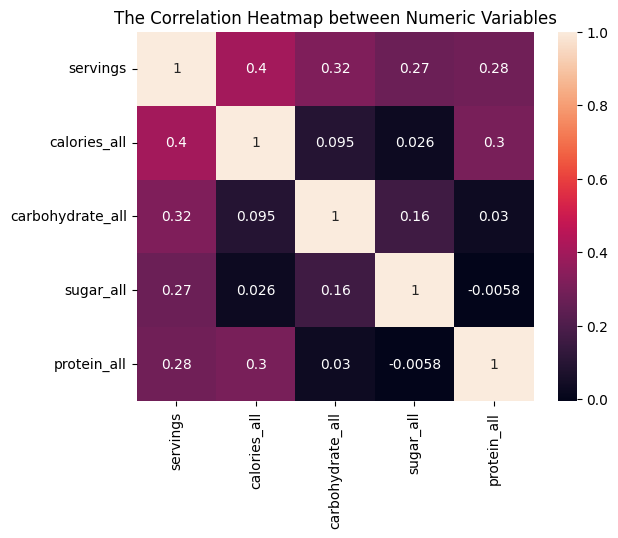

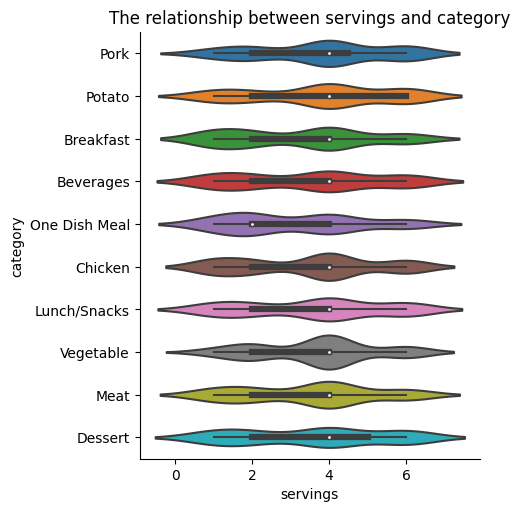

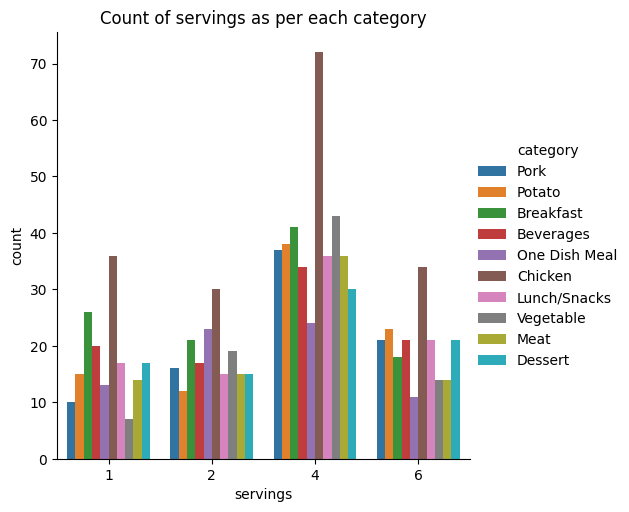

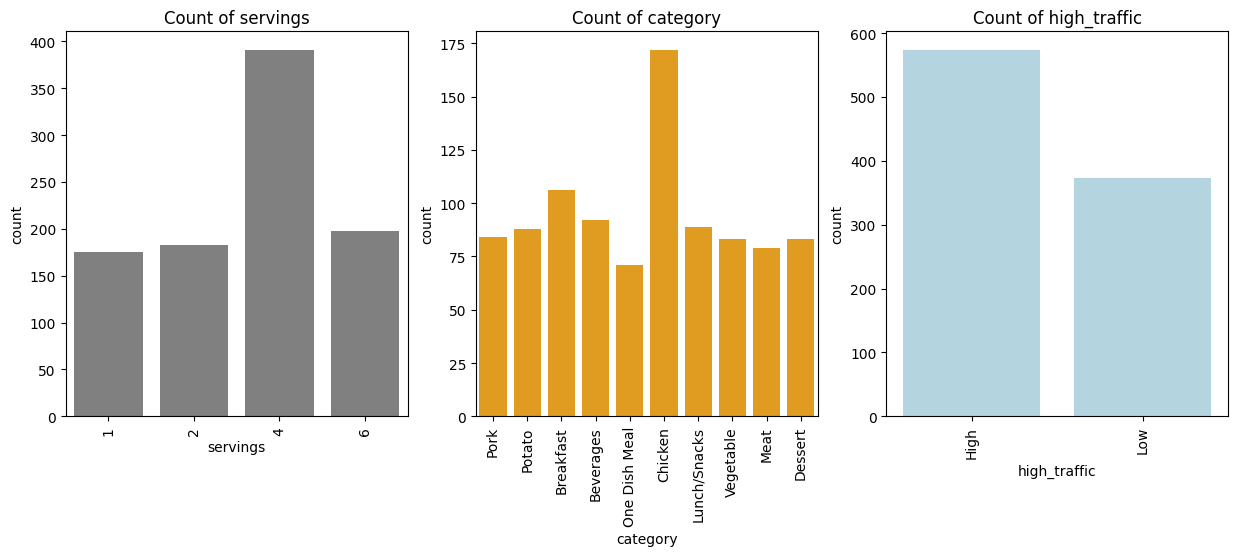

In [14]:
#Two or more Variables
df_corr = df2.drop(['category','high_traffic'], axis = 1)
sns.heatmap(df_corr.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables')
sns.catplot(x="servings", y="category", data=df2, kind="violin").set(title='The relationship between servings and category')
sns.catplot(x="servings", hue="category", data=df2, kind="count").set(title='Count of servings as per each category')

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x=df2['servings'], color='gray', ax=axes[0]).set(title='Count of servings')
sns.countplot(x=df2['category'], color='orange', ax=axes[1]).set(title='Count of category')
sns.countplot(x=df2['high_traffic'], color='lightblue', ax=axes[2]).set(title='Count of high_traffic')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

From above graphical representations following conclusions were made:
- From the **heatmap**, we can observe that there are **positive correlations** between the variables calories, carbohydrate, sugar, protein, and servings. The correlation coefficients for these variables are close to 0, which indicates that the relationships are weak. However, the fact that the correlations are positive suggests that as one variable increases, the others also tend to increase, and vice versa.
- The violin plot conlcuded that the density of categories data was **higher** at serving 4 and rest were almost the same. It also shows that there were no outliers within the data.
- The count plot concluded that the count of servings were higher at 4 and chicken was the most serving category.

## 4. Model Development
Considering the binary classification problem, two models suitable for this prediction are used as described below:
- **Logistic Regression:** Logistic Regression is a supervised learning algorithm used for binary classification tasks, where the target variable has two classes (e.g., 'High' and 'Low' traffic in our case). It models the relationship between the dependent variable (target) and one or more independent variables (features) by fitting a logistic function to the observed data. The logistic function outputs probabilities, and a threshold is applied to convert the probabilities into class labels.
- **Random Forest Classifier:** Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to create a more robust and accurate model. Each decision tree is trained on a random subset of the data and a random subset of features. The final prediction is made by aggregating the predictions of all individual trees.

In [21]:
#Model Fitting Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [16]:
# Recode the Categorical variables using LabelEncoder
labelencoder = LabelEncoder()
df2['category'] = labelencoder.fit_transform(df2['category'])
df2['high_traffic'] = df2['high_traffic'].replace({"High": 1, "Low": 0})

X = df2.drop('high_traffic', axis = 1) # Features
y = df2['high_traffic'] # Target variable

# Normalize the numeric features
scaler = StandardScaler()
X.iloc[:,2:7] = scaler.fit_transform(X.iloc[:,2:7])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.1 Model 1: Logistic Regression Tuning Best parameters
Grid Search Cross Validation technique is used for the tuning of parameters of logitic regression model. These parameters include C, penalty, multi_class.

In [17]:
#Model 1: Logistic Regression Tuning Best parameters
grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2", "elasticnet", None],
    "multi_class": ["auto", "ovr", "multinomial"]
}
logreg_test = LogisticRegression()
logreg_cv = GridSearchCV(logreg_test, grid, cv=10)
logreg_cv.fit(X_train, y_train)
print("Tuned hyperparameters:", logreg_cv.best_params_)
print("Best Accuracy:", logreg_cv.best_score_)
Logreg = LogisticRegression(C=0.001, multi_class='multinomial', penalty="l2")
Logreg.fit(X_train, y_train)
y_pred_log = Logreg.predict(X_test)

Tuned hyperparameters: {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2'}
Best Accuracy: 0.761623699683401


### 4.2 Model 2: Random Forest Classifier Tuning Best parameters
Again Grid Search Cross Validation technique is used for the tuning of parameters of Random Forest Classifier. These parameters include n_estimators.

In [18]:
#Model 2 Random Forest Classifier
# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150]
}

rf_classifier = RandomForestClassifier(random_state=42) # Initiate the Random Forest Classifier
rf_grid_search = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')# Initiate the GridSearchCV object with cross-validation (cv=5)

rf_grid_search.fit(X_train, y_train)# Fit the GridSearchCV object to the training data
best_params = rf_grid_search.best_params_# Get the best parameters and best accuracy from the grid search
best_accuracy = rf_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100}
Best Accuracy: 0.728218272955115


Based on the hyperparameter tuning, the best hyperparameters for the Logistic Regression model are as follows:
- Regularization Strength (C): 0.001
- Multi-Class Setting (multi_class): 'multinomial'
- Regularization Type (penalty): 'l2' (L2 regularization)
The tuned Logistic Regression model achieved an accuracy of approximately 76.16% on the data. This means that when using the selected hyperparameters, the model can correctly predict the class labels (high or low traffic) for approximately 76.16% of the recipes in the dataset.

After hyperparameter tuning for the Random Forest Classifier, the best hyperparameter is as follows:
- Number of Estimators (n_estimators): 100
The tuned Random Forest Classifier achieved an accuracy of approximately 72.82% on the data. This means that when using 100 decision trees in the ensemble, the model can correctly predict the class labels (high or low traffic) for approximately 72.82% of the recipes in the dataset.

## 5. Model Evaluation
### 5.1 Model Evaluation - Logistic Regression
After training the Logistic Regression model with the tuned hyperparameters, let's evaluate its performance on the test set:
- **Accuracy:** The Logistic Regression model achieved an accuracy of approximately 76.14%, indicating that it correctly predicted the traffic category for around 76.14% of the recipes in the test set.
- **Confusion Matrix:** The confusion matrix shows the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. TP: 142, FN: 36 (Recipes correctly predicted as 'High' and incorrectly predicted as 'Low') TN: 75, FP: 32 (Recipes correctly predicted as 'Low' and incorrectly predicted as 'High')
- **Classification Report:** The classification report provides metrics such as precision, recall, and F1-score for each class ('High' and 'Low') and their weighted average. The model achieved a high F1-score (0.81) for class 'High', indicating good overall performance for predicting 'High' traffic recipes. The model also shows decent performance for class 'Low' with an F1-score of 0.69.
- **ROC Curve:** The Receiver Operating Characteristic (ROC) curve is plotted, showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different probability thresholds. A higher area under the ROC curve (AUC) indicates better model performance. Here, we don't have the AUC value, but visual inspection shows that the model is performing reasonably well.
- **Feature Importance:** The bar chart displays the feature importance scores of the Logistic Regression model. The feature importance shows the impact of each feature on predicting the target variable ('High' traffic). Higher coefficient values indicate more significant impact, and vice versa.
Finally, the model also predicts the number of recipes with a probability of at least 80% of being classified as 'High' traffic. In this case, there are 56 recipes with such a high probability.

Logistic Regression Accuracy: 0.7614035087719299
Confusion matrix of Logistic Regression Model:
 [[ 75  32]
 [ 36 142]]
Classification report of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       107
           1       0.82      0.80      0.81       178

    accuracy                           0.76       285
   macro avg       0.75      0.75      0.75       285
weighted avg       0.76      0.76      0.76       285

Number of recipes with "High" value of traffic with 80% probability are 56
[0.69820008 0.84343919 0.74135528 0.68480734 0.87903244 0.60310804
 0.44852825 0.51978961 0.67507717 0.45250033]


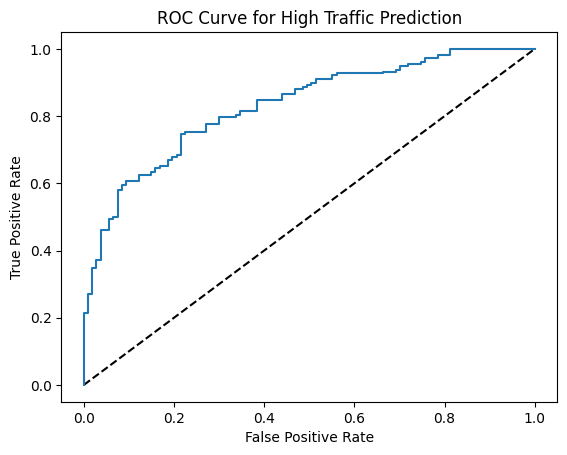

Text(0.5, 1.0, 'Feature Importance for Logistic Regression model')

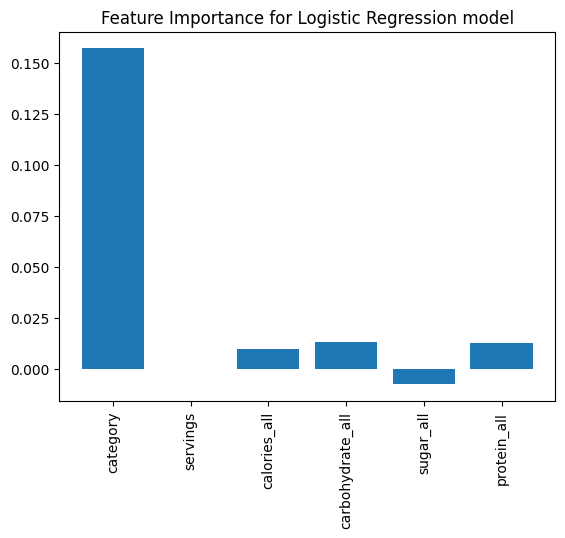

In [19]:
#Model Evaluation
#Logistic Regression Evaluation
Logreg = LogisticRegression(C=0.001, multi_class='multinomial', penalty="l2")
Logreg.fit(X_train, y_train)
y_pred_log = Logreg.predict(X_test)
accuracy_df = accuracy_score(y_test, y_pred_log) # Calculate accuracy and confusion matrix
print("Logistic Regression Accuracy:", accuracy_df)
print("Confusion matrix of Logistic Regression Model:\n", confusion_matrix(y_test, y_pred_log))
print("Classification report of Logistic Regression Model:\n", classification_report(y_test, y_pred_log))

# Predict probabilities
y_pred_probs = Logreg.predict_proba(X_test)[:, 1]
High_Traffic_80 = np.sum(y_pred_probs >= 0.80)
print('Number of recipes with "High" value of traffic with 80% probability are', High_Traffic_80)
print(y_pred_probs[:10])
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High Traffic Prediction')
plt.show()

resultdict = {}
for i in range(len(list(X))):
    resultdict[list(X)[i]] = Logreg.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Logistic Regression model')


### 5.2 Model Evaluation - Random Forest Classifier
After training the Random Forest Classifier with the specified hyperparameters, let's evaluate its performance on the test set:
- **Accuracy:** The Random Forest Classifier achieved an accuracy of approximately 71.23%. It correctly predicted the traffic category for around 71.23% of the recipes in the test set.
- **Confusion Matrix:** The confusion matrix shows the number of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. TP: 138, FN: 40 (Recipes correctly predicted as 'High' and incorrectly predicted as 'Low') TN: 65, FP: 42 (Recipes correctly predicted as 'Low' and incorrectly predicted as 'High')
- **Classification Report:** The classification report provides metrics such as precision, recall, and F1-score for each class ('High' and 'Low') and their weighted average. The model achieved an F1-score of 0.77 for class 'High', indicating good overall performance for predicting 'High' traffic recipes. The model also shows a decent F1-score of 0.61 for class 'Low'.
- **Feature Importance:** The bar chart displays the feature importance scores obtained from the Random Forest Classifier. The feature importance values represent the relative importance of each feature in predicting the target variable ('High' traffic). Higher feature importance values indicate greater influence on the model's predictions.
- **ROC Curve:** The ROC curve is plotted to show the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different probability thresholds. Visual inspection of the ROC curve can provide insights into the model's overall performance.
- **Number of High-Traffic Recipes:** The Random Forest Classifier predicts 82 recipes with a probability of at least 80% of being classified as 'High' traffic.
Overall, the Random Forest Classifier shows decent performance in predicting high-traffic recipes, with an accuracy of approximately 71.23% and relatively good F1-scores. The feature importance plot gives insights into which features are most influential in making predictions. However, as with any model evaluation, it is essential to validate the model's performance on a separate test set and explore other hyperparameter combinations or techniques to further improve its accuracy.


Random Forest Accuracy: 0.712280701754386
Confusion Matrix: [[ 65  42]
 [ 40 138]]
Classification report of Random Forest Model:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       107
           1       0.77      0.78      0.77       178

    accuracy                           0.71       285
   macro avg       0.69      0.69      0.69       285
weighted avg       0.71      0.71      0.71       285



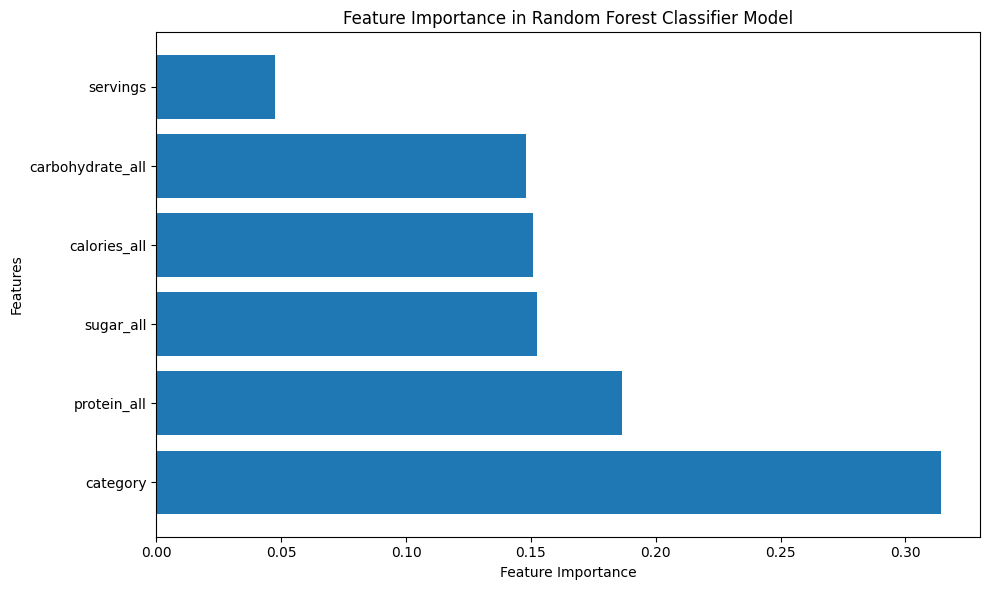

Number of recipes with "High" value of traffic with 80% probability are 82
[0.66333333 0.95       0.87       0.54       0.87       0.81
 0.36       0.73       0.8        0.66      ]


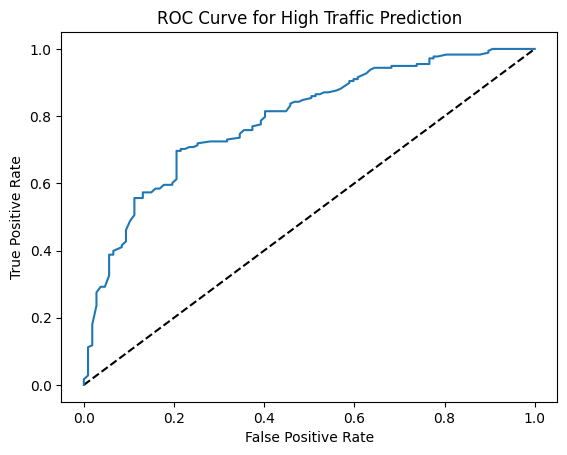

In [27]:
#Random Forest Classifier Evaluation
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42) # Initiate the Random Forest Classifier
rf_classifier.fit(X_train, y_train)# Fit the GridSearchCV object to the training data
rf_pred = rf_classifier.predict(X_test)

accuracy_df = accuracy_score(y_test, rf_pred) # Calculate accuracy and confusion matrix
confusion_matrix_df = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", accuracy_df)
print("Confusion Matrix:", confusion_matrix_df)
print("Classification report of Random Forest Model:\n", classification_report(y_test, rf_pred))

# Get the feature importance from the Random Forest model
feature_importance = rf_classifier.feature_importances_
feature_names = rf_classifier.feature_names_in_
# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by their importance values (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Classifier Model')
plt.tight_layout()
plt.show()

#Generating ROC curve
rf_pred_probs =  rf_classifier.predict_proba(X_test)[:, 1]
High_Traffic_80 = np.sum(rf_pred_probs >= 0.80)
print('Number of recipes with "High" value of traffic with 80% probability are', High_Traffic_80)
print(rf_pred_probs[:10])
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High Traffic Prediction')
plt.show()


## 6. Model Performance for Recipe Business
To evaluate the model performance in the context of the business goals, we can consider the following approach:
1. **Business Goal 1**: Predict which recipes will have high traffic.
- For this goal, the business would want to focus on maximizing the model's ability to correctly identify recipes with high traffic ('High' class). The key metric to focus on is recall (true positive rate), as it represents the proportion of actual high-traffic recipes that the model correctly predicts.
- A high recall value means the model can effectively capture most of the high-traffic recipes, which is crucial for business success. It ensures that popular recipes are not missed, leading to higher engagement and revenue potential.
2. **Business Goal 2**: Predict the "High" value of traffic of the recipes with 80% probability.
- For this goal, the business aims to predict the class labels with high confidence, specifically those with 80% probability. Here, we want to maximize both precision and recall to ensure that recipes classified as 'High' traffic with 80% probability are indeed highly popular. By achieving high precision, we minimize the chances of false positives (recipes incorrectly labeled as 'High' traffic). High recall ensures that we capture most of the actual 'High' traffic recipes with 80% probability.

Using this approach, we can assess the performance of the models:

1. **Logistic Regression Model:**
- **Accuracy:** Approximately 76.14%
- **Recall:** 0.80 for 'High' class
- **Precision:** 0.82 for 'High' class
- **F1-score:** 0.81 for 'High' class
The Logistic Regression model performs well in predicting high-traffic recipes, achieving a relatively high recall of 0.80. This means it can capture around 80% of actual high-traffic recipes correctly. Additionally, it has a high precision of 0.82, indicating that when the model predicts a recipe as 'High' traffic, it is correct approximately 82% of the time. Overall, the model demonstrates a good balance between identifying popular recipes and avoiding false positives.

2. **Random Forest Classifier Model:**
- **Accuracy:** Approximately 71.23%
- **Recall:** 0.78 for 'High' class
- **Precision:** 0.77 for 'High' class
- **F1-score:** 0.77 for 'High' class
The Random Forest Classifier model also shows decent performance, with a recall of 0.78 for 'High' class, capturing around 78% of actual high-traffic recipes. The precision is 0.77, meaning that when the model predicts a recipe as 'High' traffic, it is correct approximately 77% of the time. The model's overall performance is satisfactory, although slightly lower than the Logistic Regression model in terms of accuracy and recall.

## 7. Conclusions and Recommendations:
After evaluating both the Logistic Regression and Random Forest models for predicting high-traffic recipes, we have some important insights for the recipe business:
- **Logistic Regression Model:** The Logistic Regression model demonstrates strong performance in predicting high-traffic recipes. It achieves an accuracy of approximately 76.14%, indicating that it correctly predicts the traffic category for around 76% of the recipes in the dataset. Moreover, the model's recall for the 'High' class is 0.80, which means it can effectively capture around 80% of actual high-traffic recipes. The precision for the 'High' class is 0.82, indicating that when the model predicts a recipe as 'High' traffic, it is correct approximately 82% of the time.
- **Random Forest Classifier Model:** The Random Forest model also performs well, achieving an accuracy of approximately 71.23%. The recall for the 'High' class is 0.78, capturing about 78% of actual high-traffic recipes. The precision for the 'High' class is 0.77, indicating that when the model predicts a recipe as 'High' traffic, it is correct approximately 77% of the time.

### Recommendations
- **Focus on Popular Recipes:** Both models are capable of identifying high-traffic recipes with good precision and recall. The business should prioritize promoting and highlighting these popular recipes to attract more visitors and increase engagement.
- **Monitor and Improve Accuracy:** Continuous monitoring of the models' performance is essential. As the recipe database grows and user preferences change, retraining the models periodically can help maintain accuracy and adapt to evolving trends.
- **Utilize Predicted Probabilities:** Both models provide probabilities for each prediction. For the Logistic Regression model, we can use the predicted probabilities to identify recipes with 80% confidence of being classified as 'High' traffic. These recipes may be of particular interest for marketing and promotional efforts.
- **Analyze Key Ingredients:** Investigate the importance of individual ingredients in the recipes, as highlighted by the feature importance in the Logistic Regression model. Understanding which ingredients drive high-traffic recipes can help in creating new popular dishes or optimizing existing ones.
- **Recipe Recommendations:** Utilize the models to make personalized recipe recommendations to users based on their preferences and past interactions. Recommending popular recipes to users can enhance engagement and satisfaction.